<a href="https://colab.research.google.com/github/peace03/python25study/blob/main/AIstudy/07_03_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC(%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83%2C%EC%BD%9C%EB%B0%B1%2C%EC%A1%B0%EA%B8%B0%EC%A2%85%EB%A3%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 인공신경망을 구성하는 절차
# 1. 더미데이터 준비
# 2. 훈련용, 검증용, 테스트용으로 나눔
# 3. 심층을 만듬(dense)
# 4. model에 적용
# 5. 컴파일 진행(최적화기법을 적용 : adam)
# 6. fit(훈련)
# 7. evaluate(검증)

In [2]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정이
# 상세하게 출력되어 확인 할 수 있다. (에포크 횟수, 손실, 정확도)
# 아래쪽에  이 출력 메시지가 나옴
# 코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력

# 다시말해 fit() 메서드는 History라는 클래스 객체를 반환 함 (훈련과정의 지표, 손실, 정확도 등 내장)
# 이 값을 잘 활용하면 그래프를 그릴 수 있다.

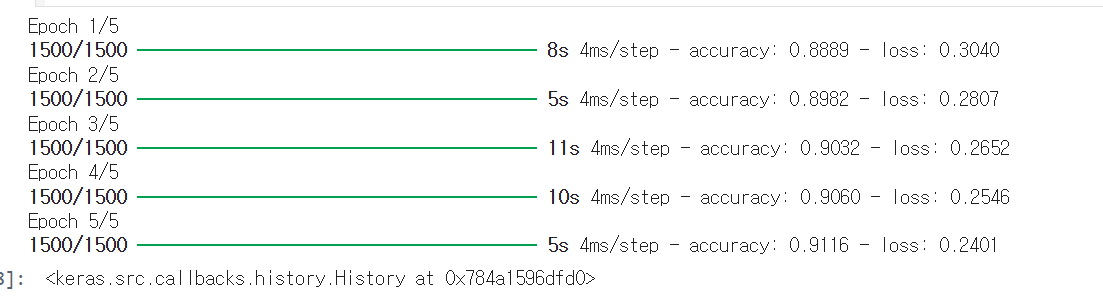

In [1]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print('훈련데이터 :')
print(train_scaled.shape, train_target.shape)
print('테스트데이터 :')
print(test_input.shape, test_target.shape)
print("검증데이터 :")
print(val_scaled.shape, val_target.shape)

훈련데이터 :
(48000, 28, 28) (48000,)
테스트데이터 :
(10000, 28, 28) (10000,)
검증데이터 :
(12000, 28, 28) (12000,)


In [2]:
# 모델을 만드는 함수를 정의함 (하나의 매개변수를 받아 리턴) .model_fn(dense추가하면 생성)
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28))) # 반복적으로 사용되는 입력 층
  model.add(keras.layers.Dense(100, activation='relu')) # 반복적으로 사용되는 2진분류 층

  # model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가함.
  if a_layer:
    model.add(a_layer) # 매개값으로 넘어오는 추가되는 층
  model.add(keras.layers.Dense(10, activation='softmax')) # 반복적으로 사용되는 다중분류 층
  return model

In [3]:
model = model_fn() # 위에서 만든 메서드 호출 하여 모델에 담음
#       model_fn(매개값이 없으면 그냥 생성, 매개값이 있으면 모델추가용)
model.summary() # 모델의 요약정보를 봄

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#                   다중분류                                    정확도

In [8]:
# fit() 메서드 결과를 history 변수에 담아 봄
history = model.fit(train_scaled, train_target, epochs=5, verbose=2) # 26초 걸림
#                                                         훈련과정 출력을 조절 함
#                           verbose=0 훈련과정을 나타내지 않음
#                           verbose=1 기본값, 에포크마다 진행 막대와 함께 손실등의 지표가 출력
#                           verbose=2 진행막대 빼고 출력

Epoch 1/5
1500/1500 - 10s - 7ms/step - accuracy: 0.8112 - loss: 0.5311
Epoch 2/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8593 - loss: 0.3905
Epoch 3/5
1500/1500 - 5s - 3ms/step - accuracy: 0.8734 - loss: 0.3517
Epoch 4/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8808 - loss: 0.3293
Epoch 5/5
1500/1500 - 4s - 3ms/step - accuracy: 0.8868 - loss: 0.3138


In [9]:
print(history)  #위에 fit한 결과를 History객체가 가지고 있는데 이것을 history 변수에 담음

In [10]:
print(history.history.keys())
# 훈련 측정 값이 담겨 있는 history 딕셔너리가 존재함
# 정확도accuracy, 손실loss 값이 있다.

# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에
# history 속성에 포함되었음

dict_keys(['accuracy', 'loss'])


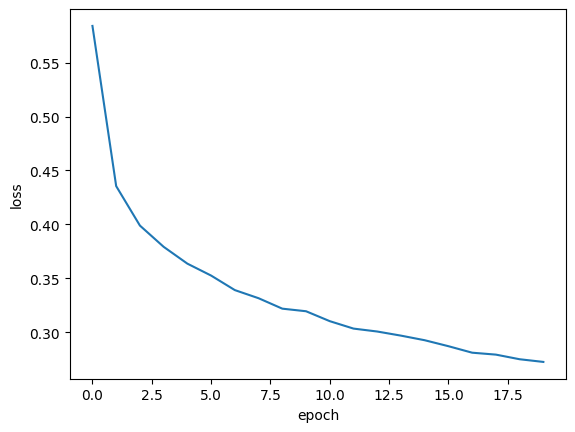

In [9]:
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능
plt.plot(history.history['loss']) # 손실율을 차트로 표시
plt.xlabel('epoch')
# 파이썬 인덱스는 0부터 시작함 5개의 에포크가 0~ 4까지 x축에 포현
plt.ylabel('loss') # 손실된 값
plt.show()

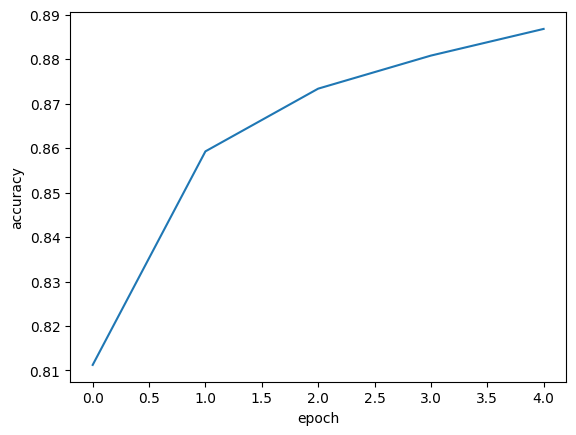

In [12]:
# 이번에는 정확도를 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 결과분석 : 에포크마다 손실이 감소하고 정확도가 향상함

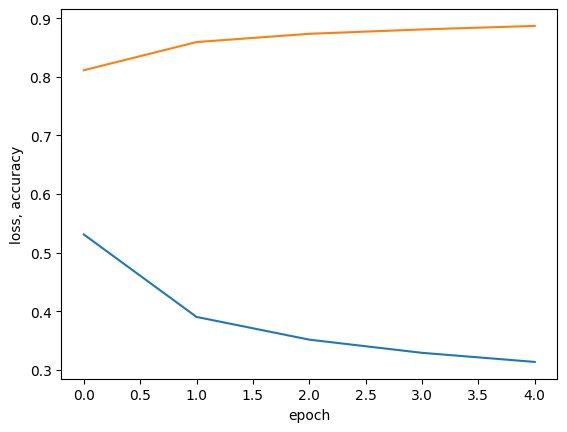

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [5]:
# 이번에는 에포크 횟수를 20번으로 늘려서 보자.
model = model_fn() # 위에서 만든 메서드로 모델 생성(3개층 입력층, 은닉층, 출력층)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 1분정도 걸림

KeyboardInterrupt: 

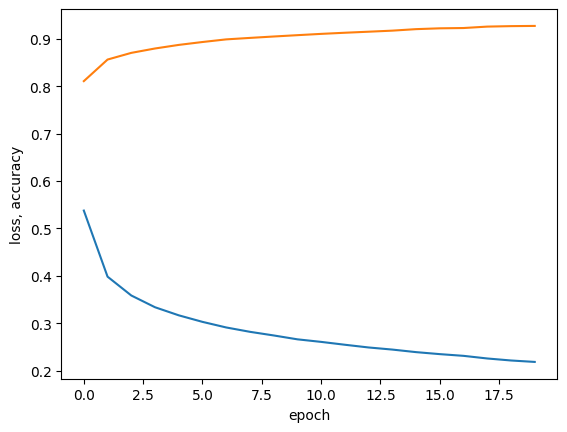

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [16]:
# 검증 손실 validation_data=(val_scaled, val_target)
# 예전에 확률적 경사 하강법을 사용 했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다.
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요함
# 그래서 위에처럼 훈련세트에 손실과 정확도만 그리면 파악이 어렵다.
# 검증 손실을 이용해서 과대/과소 적합을 응용하겠다.

# keypoint https://wikidocs.net/236194
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수임
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# 모델이 잘 훈련 되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법임

In [17]:
model = model_fn()
model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))
#                                                                   검증손실을 구하기위한 매개값 추가 됨 3분걸림

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7602 - loss: 0.6824 - val_accuracy: 0.8449 - val_loss: 0.4376
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8507 - loss: 0.4091 - val_accuracy: 0.8583 - val_loss: 0.3892
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8669 - loss: 0.3615 - val_accuracy: 0.8623 - val_loss: 0.3788
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8767 - loss: 0.3385 - val_accuracy: 0.8663 - val_loss: 0.3734
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8844 - loss: 0.3207 - val_accuracy: 0.8609 - val_loss: 0.3882
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8912 - loss: 0.3065 - val_accuracy: 0.8632 - val_loss: 0.4041
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8962 - loss: 0.2943 - val_accuracy: 0.8569 - val_loss: 0.4093
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8991 - loss: 0.2856 - 

In [18]:
print(history.history.keys())
# 정확도accuracy, 손실loss 값이 있다.
# 추가로 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss가 나옴

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


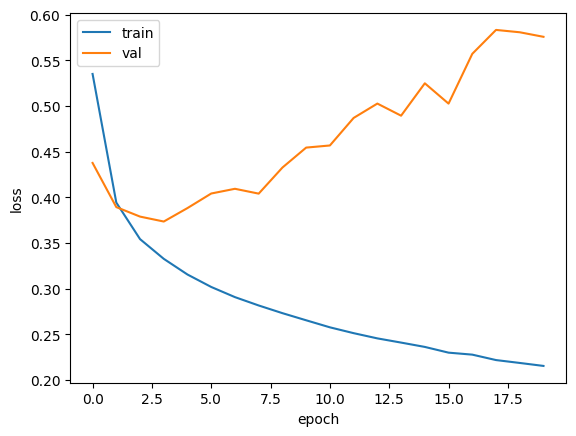

In [19]:
# 과대/과소 적합 문제를 조사하기 위해서 훈련손실, 검증 손실을 한 그래프에 그려서 비교해보자.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 결과 분석 : 초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승함
# 훈련 손실은 꾸준히 감소하기 때문에 과대 적합 모델이 만들어 짐
# 검증 손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고
# 검증 세트에 대한 정확도가 증가할 거 같다.

# 과대 적합을 막기 위한 방법으로 예전에 사용했던 규제방식대신에
# 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자.

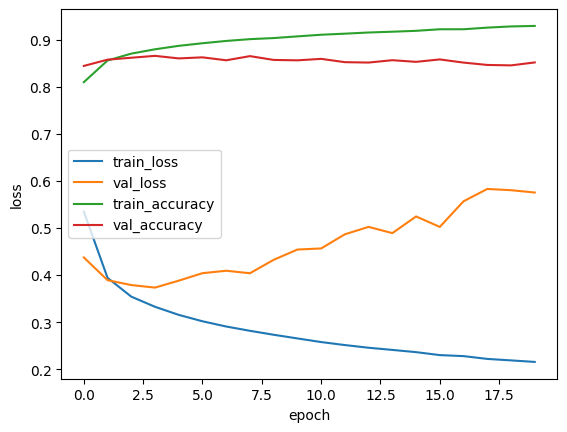

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss','train_accuracy','val_accuracy'])
plt.show()

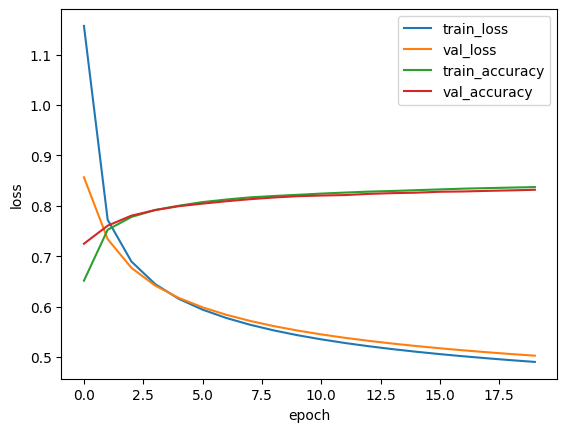

In [21]:
model = model_fn()
adagrad = keras.optimizers.Adagrad() #Adagrad 기법으로 최적화 후 차트로 보자
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss','train_accuracy','val_accuracy'])
plt.show()

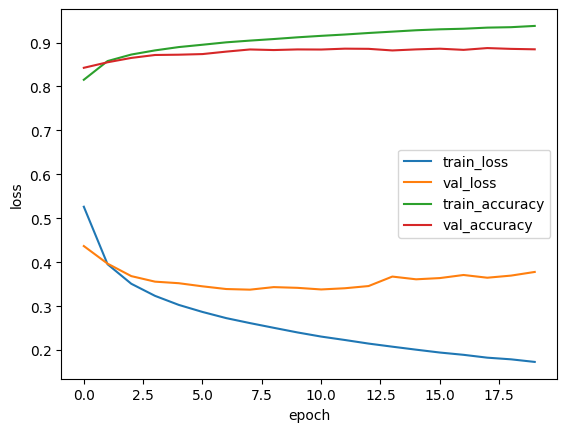

In [22]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss','train_accuracy','val_accuracy'])
plt.show()

In [6]:
model = model_fn()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss','train_accuracy','val_accuracy'])
plt.show()

#3가지의 최적화 기법을 사용해보니 adam이 안정적으로 보인다.
#대신 과대적합을 막기위한 기법이 필요해 보인다.

KeyboardInterrupt: 

In [ ]:
# 드롭 아웃 (Dropout)은 딥러닝의 기초가되는 제프리 힌턴이 소개 하였다.
# 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런 출력을 0으로 만듬) 과대 적합을 막음

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리 할 때는 은닉층의 첫번째 뉴런이 드롭아웃되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃 되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정할 것임

# 드롭 아웃이 왜 과대 적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

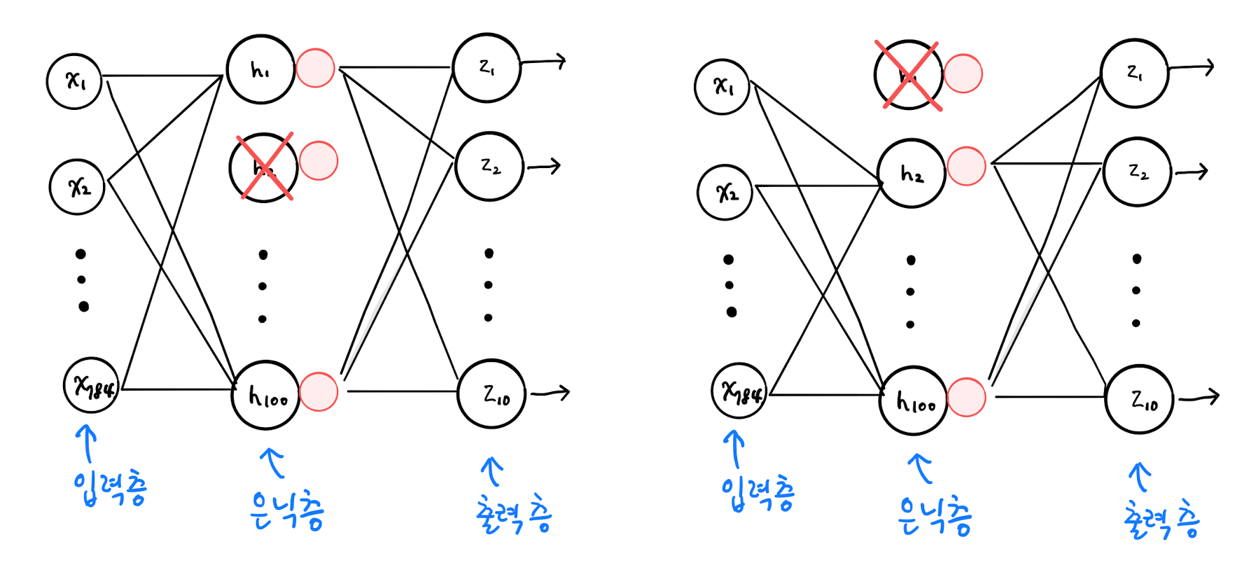

In [7]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면
# 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것 처럼 상상하게 됨
# 앙상블 : 다 좋은 예측을 만들기 위해 여러 개의 모델을 훈련하는 머신러닝 알고리즘
#   과대 적합을 막아주는 좋은 기법

# 케라스에서 드롭아웃을 keras.layers.Dropout로 제공함
# 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듬
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭 아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0.3))# 30% 정도 드롭 아웃

model.summary()# 요약 확인
# 은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

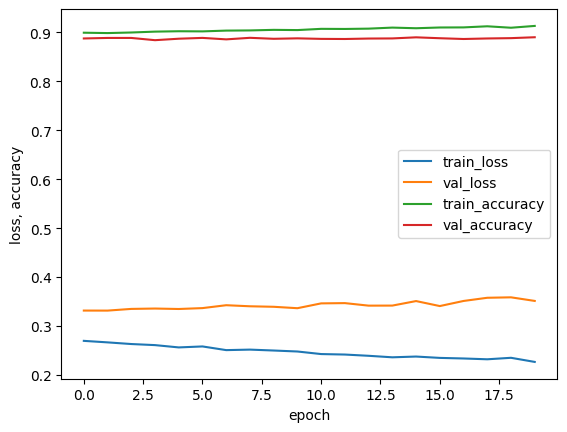

In [10]:
# 주의사항 : 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않는다.
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
# 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련 손실과 검증 손실의 그래프를 그려보자.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss', 'val_loss','train_accuracy', 'val_accuracy'])
plt.show()
# 과대 적합이 확실이 줄어 듬 10번째 에포크가 검증 손실의 감소가 멈추지만 크게 상승하지 않음
# 20번의 에포크를 실행해서 결국 과대 적합이 되었음 -> 10번만 해보까??? (조기종료에서 해보자.)

In [11]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 해본다.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

model.save('model-whole-ep10.keras') #모델저장

# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있다.
# 텐서플로의 체크포인트 포멧으로 저장하지만 https://www.tensorflow.org/guide/checkpoint?hl=ko
# .h5일 경우 HDF5 포멧으로 저장함 https://geunuk.tistory.com/466

model.save_weights('model-ep10.weights.h5') # HDF5 형식으로도 저장됨 (폴더에서 확인)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# 이제는 저장한 모델을 불려와 테스트를 진행 해보자
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 13 03:48 model-ep10.weights.h5
-rw-r--r-- 1 root root 979407 Nov 13 03:48 model-whole-ep10.keras


In [13]:
# 실험 1
# 훈련하지 않은 새로운 모델을 만들고 model-ep10.weights.h5 파일에서
# 훈련된 모델 파라미터를 읽어서 사용

# model_fn() 위와 동일한 모델
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 모델

model.load_weights('model-ep10.weights.h5')# 이전에 저장했던 모델 파라미터를 로딩
# 이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weight() 메서드 임
# 주의사항 : load_weights() 메서드를 사용하려면 save_weight() 메서드로 저장했던 모델과
# 정확히 같은 구조를 가져야함

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 모델의 검증 정확도를 확인 해보자.
import numpy as np

# predict() 메서드는 사이킷 런과 다른 샘플마다 10개의 클래스에 대한 확률을 반환 (다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 때문에
# predict()메서드는 (12000, 10)크기의 배열을 반환
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타킷 레이블과 비교하여 정확도를 계산해보자
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

# axis=-1 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예를 들어 아래 그림처럼 5x3배열에 axis=1로 한값과 axis=0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교하여 같으면 1이되고 다르면 0이됨
# 이를 평균으로 출력해 봄(정확도)
print(np.mean(val_labels == val_target)) # 88.29% 평균

# axis=1 이면 열을 따라 각 행의 최대값의 인덱스를 선택하고
# axis=0 이면 행을 따라 각 열의 최대값의 인덱스를 선택함.
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타킷(val_target)을 비교
#   -> 두 배열에서 각 위치의 값이 같이면 1, 다르면 0 (평균하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8829166666666667


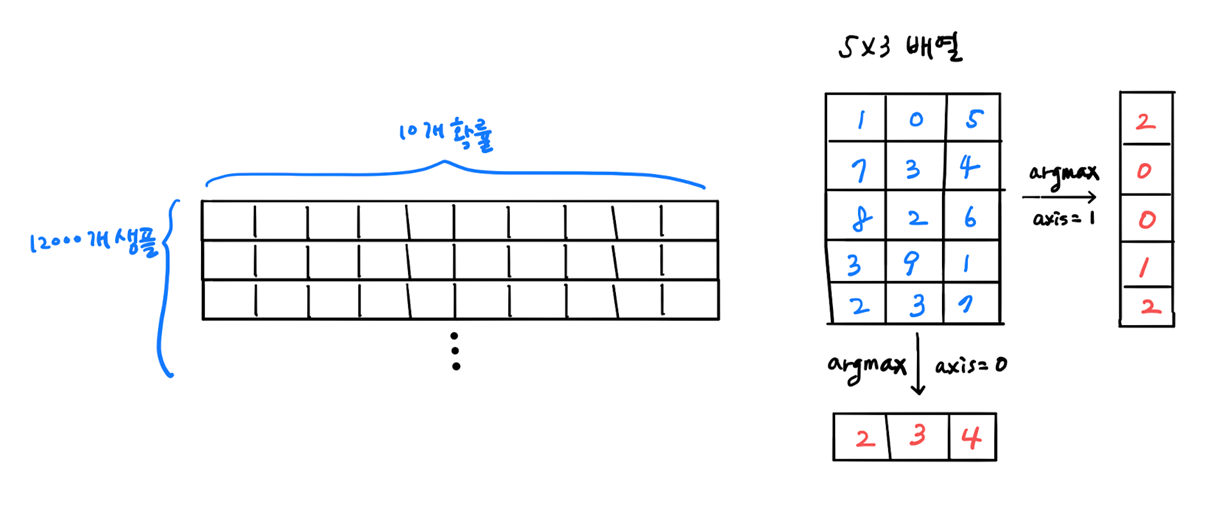

In [15]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력 해봄
model = keras.models.load_model('model-whole-ep10.keras') # load_model()저장된 케라스 파일 읽기
model.evaluate(val_scaled, val_target) # 같은 모델을 불러 들였기 때문에 위와 정확도가 같음

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상능하는 지점을 확인
# 모델을 과대적합 되지 않은 에포크만큼 다시 훈련함
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법을 연구 해보자. -> 케라스 콜백

# https://ltlkodae.tistory.com/13 케라스 모델을 저장하는 방법 2가지 분석

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8854 - loss: 0.3257


[0.32520437240600586, 0.8829166889190674]

In [17]:
# 실험2
# 아예 파일로 새로운 모델을 만들고 바로 사용해 보자.
# 추가적으로 콜백이라는 것을 활용 해보자.
# 콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, 케라스.콜백 패키지에 있다.
# fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용
# 지금 우리가 사용할 콜백은 ModelCheckpoint 콜백으로 에포크마다 모델을 저장함
# save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# 모델 훈련후 best-model.keras에 최상의 검증 점수를 낸 모델이 저장됨

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7324 - loss: 0.7666 - val_accuracy: 0.8409 - val_loss: 0.4296
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8374 - loss: 0.4502 - val_accuracy: 0.8599 - val_loss: 0.3829
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8499 - loss: 0.4090 - val_accuracy: 0.8620 - val_loss: 0.3705
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8592 - loss: 0.3840 - val_accuracy: 0.8682 - val_loss: 0.3537
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8656 - loss: 0.3701 - val_accuracy: 0.8726 - val_loss: 0.3440
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8682 - loss: 0.3574 - val_accuracy: 0.8763 - val_loss: 0.3389
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8744 - loss: 0.3424 - val_accuracy: 0.8784 - val_loss: 0.3332
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8771 - loss: 0.3352 

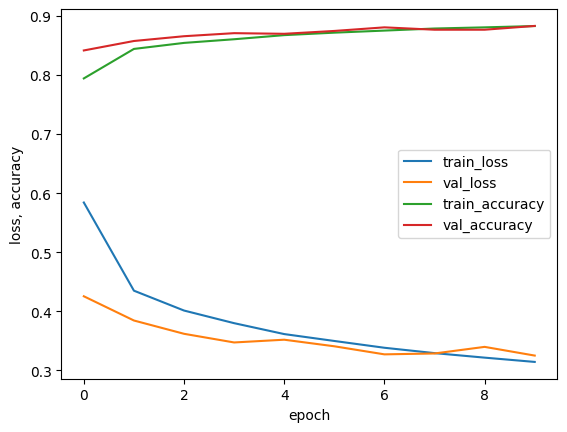

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8873 - loss: 0.3208


[0.3219696879386902, 0.8881666660308838]

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['train_loss','val_loss','train_accuracy','val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (32.19%, 88.81%) 에포크 9번
# 결론 20번을 다 돌리고 좋은 점수가 나온 9번째 에포크를 저장함.

In [ ]:
# keras.callbacks.ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 주었음
# 여전히 20번의 에포크 동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대 적합이
# 더 커지기 때문에 훈련을 계속할 필요가 없음.
# 이때 훈련을 종료하면 자원과 시간일 아낄 수 있음 -> 조기종료(early stopping)

# 조기 종료는 딥러닝 분야에 많이 사용하는 기법
# 에포크의 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기도 함 - 규제방법중 하나

In [20]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 회수로 지정
# patience=2 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지 (patience:인내심)
# restore_best_weights=True -> 가장 낮은 검증 솔실을 낸 모델 파리미터로 돌림
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # 얼리

# 훈련을 중지하고 현재 모델의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target,epochs=20,verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7326 - loss: 0.7654 - val_accuracy: 0.8481 - val_loss: 0.4192
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8383 - loss: 0.4505 - val_accuracy: 0.8558 - val_loss: 0.3873
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8525 - loss: 0.4083 - val_accuracy: 0.8672 - val_loss: 0.3631
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8598 - loss: 0.3889 - val_accuracy: 0.8677 - val_loss: 0.3589
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8651 - loss: 0.3697 - val_accuracy: 0.8725 - val_loss: 0.3423
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8709 - loss: 0.3544 - val_accuracy: 0.8737 - val_loss: 0.3494
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8742 - loss: 0.3424 - val_accuracy: 0.8768 - val_loss: 0.3360
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8743 - loss: 0.3368 - 

In [21]:
print(early_stopping_cb.stopped_epoch) # 조기종료 시점 에포크

12


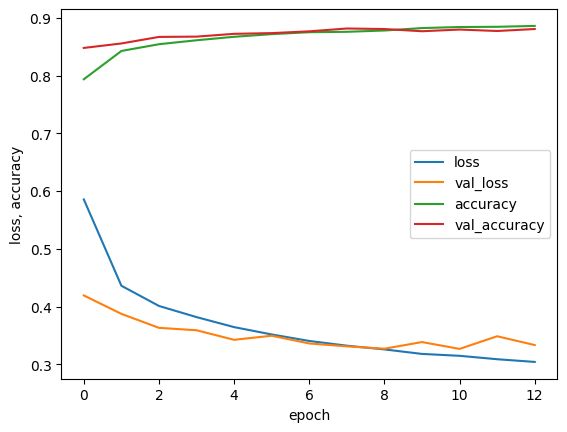

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8832 - loss: 0.3248


[0.32657963037490845, 0.8799166679382324]

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss, accuracy')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()
model.evaluate(val_scaled, val_target) # 검증세트의 성능 확인 (32.49%, 88.09%) 에포크 10번
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함꼐 사용하면 최상의 모델을 자동으로 저장해 준다는 것을 명심